# **CLASIFICACIÓN DE ENFERMEDAD CARDÍACA CON TÉCNICAS DE MACHINE LEARNING**

---


JACKELINE ROMERO

ANDRÉS CERVERA

PABLO IVORRA

ALBERTO DE GEA

In [66]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [67]:
ruta = "/content/train.csv"
df = pd.read_csv(ruta)

In [68]:
print(df.shape)
df.head()

(732, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3


## **DESCRIPCIÓN DE LA BASE DE DATOS**


*   AGE: edad del paciente
*   SEX: Sexo del paciente
      * 0: Mujer
      * 1: Hombre

*   CP: Tipo de dolor en el pecho
      * Tipo 1: Angina típica
      * Tipo 2: Angina Atípica
      * Tipo 3: Dolor no anginal
      * Tipo 4: Asintomático

*   TRESTBPS: Presión arterial en reposo en mm Hg al ingreso al hospital
*   CHOL: Colesterol sérico en mg /dl

*   FBS: dolor provocado por el esfuerzo
*   RESTECG: Resultados electrocardiográficos en reposo
      * 0: Normal
      * 1: Tener anormalidad de onda ST-T (inversiones de onda T y / o elevación o Depresión de ST de > 005 mV)
      * 2: Muestra hipertropía ventricular izquierda probable.

*   THALACH: Frecuencia cardiaca en reposo
*   EXANG: Angina inducida por el ejercicio
*   OLDPEAK: Depresión del ST inducida por el ejercicio en relación con el descanso

*   SLOPE: La pendiente del segmento ST de ejercicio pico
      * 1: ascenso
      * 2: plano
      * 3: descenso
*   CA: Numero de vasos principales (0-3) coloreados por fluoroscopia

*   THAL: El estado del corazón según la prueba de Thallium
      * 3: normal
      * 6: defecto fijo
      * 7: defecto reversible

*   LABEL: Presencia de enfermedad cardíaca (estado de enfermedad angiográfica)
      * 0: Saludable
      * 1: diagnosticado como etapa 1
      * 2: Diagnosticado como etapa 2
      * 3: Diagnosticado como etapa 3
      * 4: diagnosticado como etapa 4

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


# **1. ANÁLISIS Y LIMPIEZA DEL DATASET DE ENTRENAMIENTO**


En esta primera fase, procederemos a limpiar el dataset siguiendo las situaciones más comunes.

## Datos faltantes

En primer lugar estudiaremos la existencia de registros incompletos en nuestro dataset.

In [70]:
# Ver valores nulos en el DataFrame
valores_nulos = df.isnull().sum()

# Imprimir el número de valores nulos en cada columna
print(valores_nulos)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


Observamos que no hay registros vacíos en el dataset de entrenamiento, por lo que procedemos al siguiente paso.

En segundo lugar, estudiaremos el reparto de valores de cada variable buscando posibles anomalías.

Empezamos con la variable de la edad.

### AGE

---

In [71]:
# Obtener la distribución de valores de la variable "age" y ordenar por edad ascendente
reparto_age = df['age'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_age)


age
28.0     1
29.0     2
30.0     1
31.0     2
32.0     3
33.0     1
34.0     5
35.0     8
36.0     6
37.0    10
38.0    12
39.0    13
40.0     7
41.0    24
42.0    15
43.0    19
44.0    15
45.0    14
46.0    20
47.0    13
48.0    23
49.0    22
50.0    21
51.0    27
52.0    29
53.0    27
54.0    38
55.0    29
56.0    34
57.0    33
58.0    36
59.0    29
60.0    24
61.0    25
62.0    26
63.0    24
64.0    17
65.0    14
66.0    12
67.0     9
68.0     9
69.0    12
70.0     5
71.0     4
72.0     2
73.0     1
74.0     4
75.0     3
76.0     2
Name: count, dtype: int64


Como la edad es un número entero, nos podemos ahorrar sus decimales, por lo que pasamos la variable a formato entero.

In [72]:
# Convertir los valores de la columna 'age' a enteros en el DataFrame df
df['age'] = df['age'].astype(int)

# Obtener la distribución de valores y ordenarla por edad ascendente
reparto_age = df['age'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_age)


age
28     1
29     2
30     1
31     2
32     3
33     1
34     5
35     8
36     6
37    10
38    12
39    13
40     7
41    24
42    15
43    19
44    15
45    14
46    20
47    13
48    23
49    22
50    21
51    27
52    29
53    27
54    38
55    29
56    34
57    33
58    36
59    29
60    24
61    25
62    26
63    24
64    17
65    14
66    12
67     9
68     9
69    12
70     5
71     4
72     2
73     1
74     4
75     3
76     2
Name: count, dtype: int64


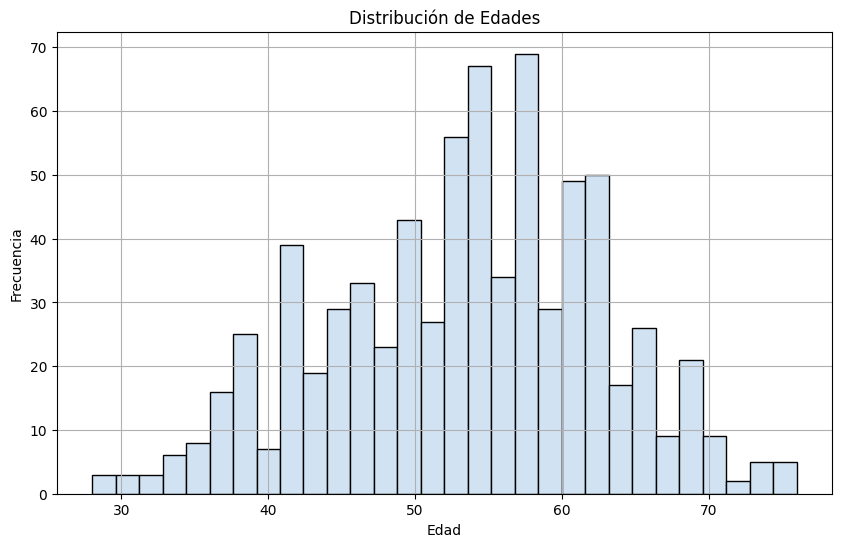

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = sns.color_palette("Blues", 30)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color=custom_palette[5], edgecolor='black') # Puedes ajustar el número de bins según lo necesites
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

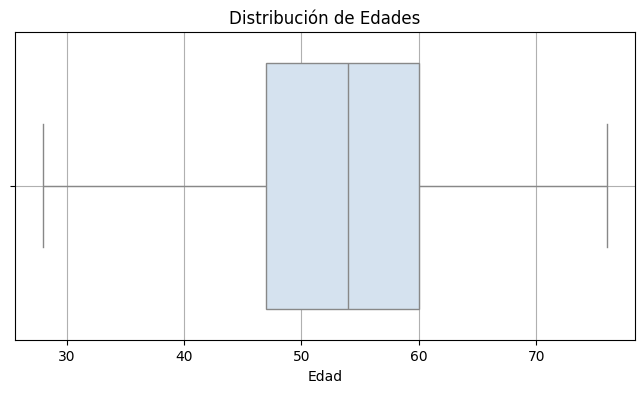

In [74]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'], color=custom_palette[5])  # Utiliza el mismo color que el histograma
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.grid(True)
plt.show()

Podemos observar que el mínimo de edad es de 28 años, mientras que el máximo es de 76 años. La media de edad es de 53,36 años y la mediana de 54 años. También podemos observar que las edades están concentradas entre los 50 y 60 años.

### SEX

---

Ahora procedemos a estudiar la variable del sexo.

In [75]:
# Obtener la distribución de valores de la variable "sex" y ordenar por edad ascendente
reparto_sex = df['sex'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_sex)

sex
0.0    154
1.0    578
Name: count, dtype: int64


Vemos que el dataset otorga el valor 1 al sexo masculino, y 0 al femenino, por lo que podemos descartar los decimales también.

In [76]:
# Convertir los valores de la columna 'sex' a enteros en el DataFrame df
df['sex'] = df['sex'].astype(int)

# Obtener la distribución de valores y ordenarla por sexo ascendente
reparto_sex = df['sex'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por sexo ascendente
print(reparto_sex)


sex
0    154
1    578
Name: count, dtype: int64


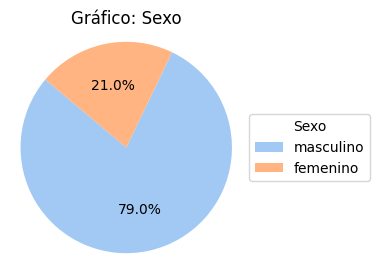

In [77]:
df['sex'] = df['sex'].astype(str)

df['sex'] = df['sex'].replace({'0': 'femenino', '1': 'masculino'})

conteo_sex = df['sex'].value_counts()

paleta_sexo_pastel = sns.color_palette("pastel", 2)

# Calcular los porcentajes
porcentajes = 100 * conteo_sex / len(df)

# Crear el gráfico de quesos
plt.figure(figsize=(3, 3))
pie = plt.pie(porcentajes, labels=['', ''], autopct='%1.1f%%', startangle=140, colors=paleta_sexo_pastel)

plt.title('Gráfico: Sexo')

plt.axis('equal')  # Asegura que el gráfico sea un círculo

plt.legend(pie[0], porcentajes.index, title="Sexo", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

De los pacientes el 21%, 154 son mujeres, mientras que el 79%, es decir, 578 son hombres.

### CP

---

Procedemos a estudiar la variable cp, que otorga valores del 1 al 4 según el tipo de dolor del paciente.

In [78]:
# Obtener la distribución de valores de la variable "cp" y ordenar por edad ascendente
reparto_cp = df['cp'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_cp)

cp
1.0     35
2.0    138
3.0    168
4.0    391
Name: count, dtype: int64


Descartamos los decimales de la misma manera.

In [79]:
# Convertir los valores de la columna 'cp' a enteros en el DataFrame df
df['cp'] = df['cp'].astype(int)

# Obtener la distribución de valores y ordenarla por edad ascendente
reparto_cp = df['cp'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por cp ascendente
print(reparto_cp)


cp
1     35
2    138
3    168
4    391
Name: count, dtype: int64


<ipython-input-80-305b23c9269c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cp'], shade=True, color='skyblue')


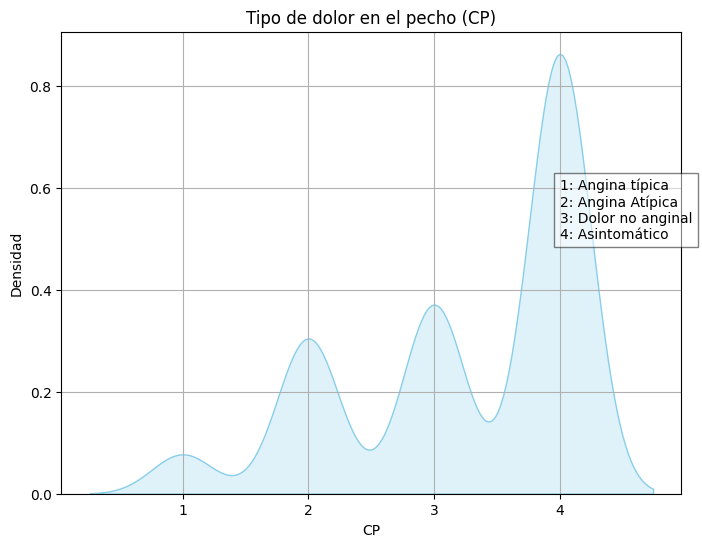

In [80]:
# Crear el gráfico de densidad de la variable CP

plt.figure(figsize=(8, 6))
sns.kdeplot(df['cp'], shade=True, color='skyblue')
plt.title('Tipo de dolor en el pecho (CP)')
plt.xlabel('CP')
plt.ylabel('Densidad')
plt.grid(True)

plt.text(4, 0.5, "1: Angina típica\n2: Angina Atípica\n3: Dolor no anginal\n4: Asintomático", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

A través del gráfico de densidad, podemos observar que el tipo de dolor en el pecho más frecuente es el 4, "asintomático", seguido por el tipo de dolor no anginal y la angina atípica.

### TRESTBPS

---

Procedemos con la variable trestbps, que corresponde a la presión arterial en reposo.

In [81]:
# Obtener la distribución de valores de la variable "trestbps" y ordenar por edad ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_trestbps)

trestbps
0         1
100       5
100.0     9
102.0     2
104       2
         ..
94.0      2
95        3
96        1
98.0      1
?        47
Name: count, Length: 95, dtype: int64


En primer lugar, al no existir ningún registro decimal, los descartamos.

In [82]:
# Eliminar los decimales de la columna 'trestbps'
df['trestbps'] = df['trestbps'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores y ordenarla por trestbps ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por trestbps ascendente
print(reparto_trestbps)


trestbps
0        1
100     14
102      2
104      3
105      7
106      2
108      6
110     44
112     12
113      1
114      2
115     14
116      2
117      1
118      9
120    109
122     11
123      1
124     11
125     24
126      6
127      1
128     15
130     88
132     10
134      9
135     17
136      7
138      9
140     78
142      7
144      3
145     11
146      3
148      2
150     42
152      4
154      2
155      6
158      2
160     41
164      1
165      2
170     12
172      2
174      1
178      3
180     11
185      1
190      2
192      1
200      2
92       1
94       2
95       3
96       1
98       1
?       47
Name: count, dtype: int64


Vemos que hay un outlier, ya que hay un registro con valor a 0, lo que no tiene sentido en nuestro dataset. Al solo ser uno, podemos proceder a descartarlo.

In [83]:
# Eliminar los decimales de la columna 'trestbps'
df['trestbps'] = df['trestbps'].astype(str).str.split('.').str[0]

# Filtrar los valores diferentes de '0'
df = df[df['trestbps'] != '0']

# Obtener la distribución de valores y ordenarla por 'trestbps' ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por 'trestbps' ascendente
print(reparto_trestbps)


trestbps
100     14
102      2
104      3
105      7
106      2
108      6
110     44
112     12
113      1
114      2
115     14
116      2
117      1
118      9
120    109
122     11
123      1
124     11
125     24
126      6
127      1
128     15
130     88
132     10
134      9
135     17
136      7
138      9
140     78
142      7
144      3
145     11
146      3
148      2
150     42
152      4
154      2
155      6
158      2
160     41
164      1
165      2
170     12
172      2
174      1
178      3
180     11
185      1
190      2
192      1
200      2
92       1
94       2
95       3
96       1
98       1
?       47
Name: count, dtype: int64


Vemos también que existen 47 valores desconocidos con valor '?'. Viendo la distribución de valores, vemos que la mayoría de los valores se encuentran entre 120 y 130. Vamos a calcular la media por si acaso.

In [84]:
# Filtrar los valores diferentes de '?' en la columna 'trestbps'
df_filtered = df[df['trestbps'] != '?']

# Convertir la columna 'trestbps' a tipo entero
df_filtered['trestbps'] = df_filtered['trestbps'].astype(int)

# Calcular la media de los valores en la columna 'trestbps'
media_trestbps = df_filtered['trestbps'].mean()

# Imprimir la media
print("Media de trestbps", media_trestbps)


Media de trestbps 132.16812865497076


<ipython-input-84-76c34d7b955a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['trestbps'] = df_filtered['trestbps'].astype(int)


Al ser la media 130, que coincide con el rango de la moda, decidimos darle el valor 130 a los 47 registros desconocidos en esta fase inicial.

In [85]:
# Reemplazar los valores '?' por 130 en la columna 'trestbps'
df['trestbps'].replace('?', 130, inplace=True)

# Convertir la columna 'trestbps' a tipo numérico
df['trestbps'] = pd.to_numeric(df['trestbps'])

# Obtener la distribución de valores y ordenarla por 'trestbps' ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por 'trestbps' ascendente
print(reparto_trestbps)


trestbps
92       1
94       2
95       3
96       1
98       1
100     14
102      2
104      3
105      7
106      2
108      6
110     44
112     12
113      1
114      2
115     14
116      2
117      1
118      9
120    109
122     11
123      1
124     11
125     24
126      6
127      1
128     15
130    135
132     10
134      9
135     17
136      7
138      9
140     78
142      7
144      3
145     11
146      3
148      2
150     42
152      4
154      2
155      6
158      2
160     41
164      1
165      2
170     12
172      2
174      1
178      3
180     11
185      1
190      2
192      1
200      2
Name: count, dtype: int64


Ahora ya tendríamos bien distribuida esta variable.



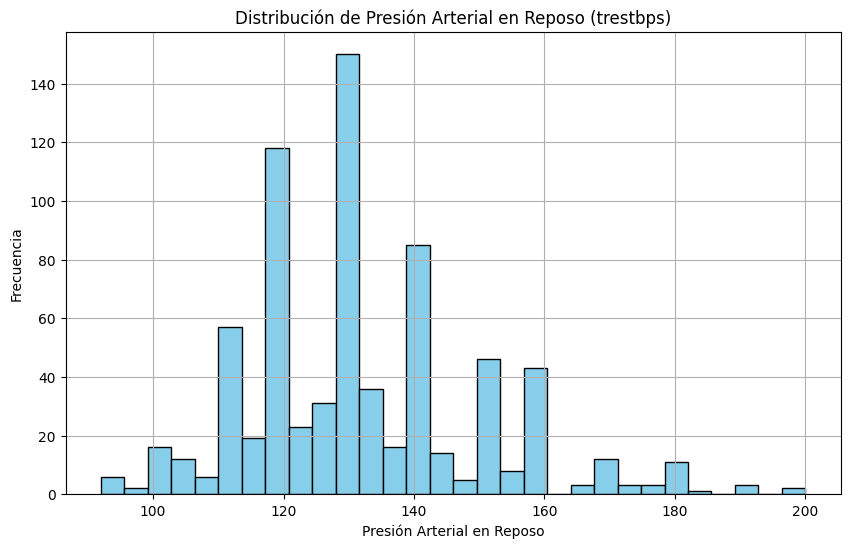

In [86]:
# Filtrar los valores '?' de la variable 'trestbps'
trestbps_filtrado = df[df['trestbps'] != '?']['trestbps'].astype(float)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(trestbps_filtrado, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Presión Arterial en Reposo (trestbps)')
plt.xlabel('Presión Arterial en Reposo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

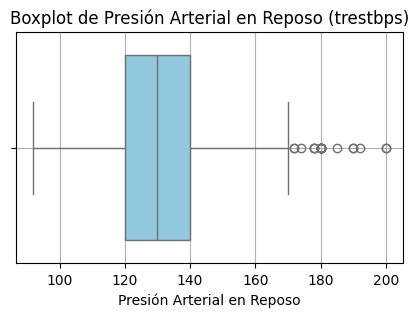

In [87]:
# Filtrar los valores '?' de la variable 'trestbps' y convertir a tipo numérico
trestbps_filtrado = df[df['trestbps'] != '?']['trestbps'].astype(float)

# Crear el boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x=trestbps_filtrado, color='skyblue')
plt.title('Boxplot de Presión Arterial en Reposo (trestbps)')
plt.xlabel('Presión Arterial en Reposo')
plt.grid(True)
plt.show()

Teniendo en cuenta el histograma y el gráfico de boxplot podemos observar que la mediana de la variable 'trestbps' es 130 y que la mayoría de los valores están entre 120 y 140. También en la última gráfica podemos observar valores atípicos fuera de los bigotes.

### CHOL

---

A continuación procedemos a estudiar la variable *chol*, que corresponde con el colesterol sérico en sangre, del cual su disposición es la siguiente:

In [88]:
# Obtener la distribución de valores de la variable 'chol'
distribucion_chol = df['chol'].value_counts().sort_index()

# Imprimir la distribución de valores de 'chol'
print(distribucion_chol)


chol
-9.0      16
0        134
100        1
100.0      1
117.0      1
        ... 
529.0      1
564.0      1
603.0      1
85.0       1
?          5
Name: count, Length: 280, dtype: int64


De la misma manera, al no existir rango decimal lo convertimos a enteros. Tampoco encontramos ningún outlier.

In [89]:
# Convertir los valores numéricos de la columna 'chol' a cadenas y eliminar los decimales
df['chol'] = df['chol'].astype(str).str.split('.').str[0]

# Imprimir la distribución de valores de 'chol'
distribucion_chol = df['chol'].value_counts(dropna=False).sort_index()
print(distribucion_chol)


chol
-9      16
0      134
100      2
117      1
126      1
      ... 
529      1
564      1
603      1
85       1
?        5
Name: count, Length: 205, dtype: int64


Vemos ahora qué hacer con los 16 registros evaluados a -9, ya que no tiene sentido en la evaluación del colesterol.

In [90]:
# Filtrar los valores diferentes de '?' y '-9' en la columna 'chol'
valid_chol = df[(df['chol'] != '?') & (df['chol'] != '-9')]['chol']

# Convertir los valores válidos a numéricos
valid_chol = pd.to_numeric(valid_chol)

# Calcular la media y la moda de los valores válidos
media_chol = valid_chol.mean()
moda_chol = valid_chol.mode()[0]

# Imprimir la media y la moda de 'chol'
print("Media de chol (sin incluir ? y -9):", media_chol)
print("Moda de chol (sin incluir ? y -9):", moda_chol)


Media de chol (sin incluir ? y -9): 200.2380281690141
Moda de chol (sin incluir ? y -9): 0


En este caso la media no es lo más óptimo, ya que lo común como vemos en la moda es no tener colesterol en sangre, por lo que sustituiremos los valores por la moda.

In [91]:
# Reemplazar los valores '?' por 0 en la columna 'chol'
df['chol'].replace('?', 0, inplace=True)

# Reemplazar los valores '-9' por 0 en la columna 'chol'
df['chol'].replace('-9', 0, inplace=True)

# Convertir la columna 'chol' a tipo numérico
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

# Imprimir la distribución actualizada de valores de 'chol'
distribucion_chol = df['chol'].value_counts(dropna=False).sort_index()
print(distribucion_chol)


chol
0      155
85       1
100      2
117      1
126      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 203, dtype: int64


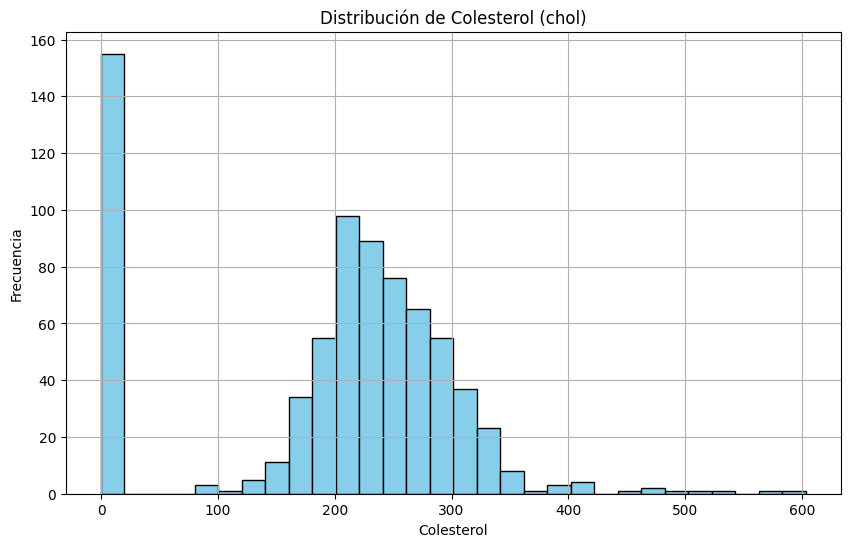

In [92]:
# Filtrar los valores negativos y '?' de la variable 'chol'
chol_filtrado = df[(df['chol'] != '-') & (df['chol'] != '?')]['chol'].astype(float)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(chol_filtrado, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Colesterol (chol)')
plt.xlabel('Colesterol')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Podemos observar que una gran frecuencia de valores corresponden a 0. Al tratarse de una variable como el colesterol, lo consideramos un valor correcto.


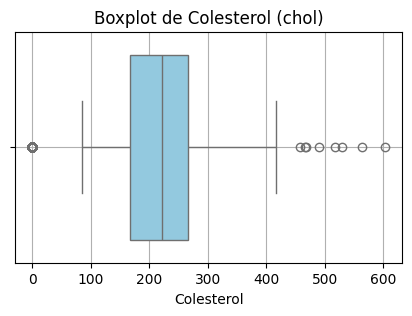

In [93]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=chol_filtrado, color='skyblue')
plt.title('Boxplot de Colesterol (chol)')
plt.xlabel('Colesterol')
plt.grid(True)
plt.show()

### FBS

---

Pasamos a la variable fbs, que evalúa a 1 si hay dolor por esfuerzo o 0 en caso contrario.

In [94]:
# Obtener la distribución de valores de la variable 'fbs'
distribucion_fbs = df['fbs'].value_counts().sort_index()

# Imprimir la distribución de valores de 'fbs'
print(distribucion_fbs)


fbs
-9.0      8
0       138
0.0     415
1        55
1.0      57
?        58
Name: count, dtype: int64


Lo pasamos a entero al no haber flotantes.

In [95]:
# Eliminar los decimales de la columna 'fbs'
df['fbs'] = df['fbs'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores de la variable 'fbs'
distribucion_fbs = df['fbs'].value_counts().sort_index()

# Imprimir la distribución de valores de 'fbs'
print(distribucion_fbs)


fbs
-9      8
0     553
1     112
?      58
Name: count, dtype: int64


Como vemos visualmente, la moda es bastante evidente, el 75% de los pacientes no experimentan dolor por esfuerzo, por lo que los valores anómalos (-9 e ?) los sustituiremos por esta moda, ya que suponemos que lo lógico y común es no sentir dolor, y no son pocos registros como para descartarlos.

In [96]:
# Reemplazar los valores '-9' y '?' por '0' en la columna 'fbs'
df['fbs'].replace(['-9', '?'], '0', inplace=True)

# Convertir la columna 'fbs' a tipo entero
df['fbs'] = df['fbs'].astype(int)

# Obtener la distribución de valores de la variable 'fbs'
distribucion_fbs = df['fbs'].value_counts().sort_index()

# Imprimir la distribución de valores de 'fbs'
print(distribucion_fbs)


fbs
0    619
1    112
Name: count, dtype: int64


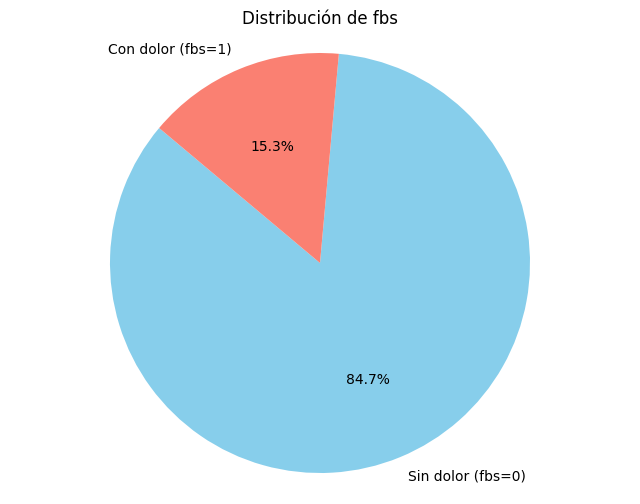

In [97]:
# Datos para el gráfico
valores = [619, 112]  # Número de casos para fbs=0 y fbs=1
etiquetas = ['Sin dolor (fbs=0)', 'Con dolor (fbs=1)']

# Crear el gráfico de quesos
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribución de fbs')
plt.axis('equal')  # Asegurar que el gráfico sea circular
plt.show()

Obtenemos un 84,7% de la población que corresponde al grupo de que no existe dolor provocado por el esfuerzo, frente a 15,3% en el que sí existe dolor.

### RESTECG

---

Continuamos con la variable restecg, la cual nos indica los resultados electrocardiográficos en reposo.

In [98]:
# Obtener la distribución de valores de la variable 'restecg'
distribucion_restecg = df['restecg'].value_counts()

# Imprimir la distribución de valores de 'restecg'
print(distribucion_restecg)


restecg
0.0    438
2.0    148
1.0    145
Name: count, dtype: int64


Vemos que la disposición de esta variable es correcta, simplemente la pasamos a entero como de costumbre.

In [99]:
#PARA TRAIN

# Convertir la columna 'restecg' a tipo entero
df['restecg'] = df['restecg'].astype(int)

# Obtener la distribución de valores de la variable 'restecg'
distribucion_restecg = df['restecg'].value_counts().sort_index()

# Imprimir la distribución de valores de 'restecg'
print(distribucion_restecg)


restecg
0    438
1    145
2    148
Name: count, dtype: int64


In [ ]:
#PARA TEST
# Eliminar los decimales de la columna 'restecg'
df['restecg'] = df['restecg'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores de la variable 'restecg'
distribucion_restecg = df['restecg'].value_counts(dropna=False).sort_index()

# Imprimir la distribución de valores de 'restecg'
print(distribucion_restecg)


restecg
-9      1
0     110
1      33
2      39
?       1
Name: count, dtype: int64


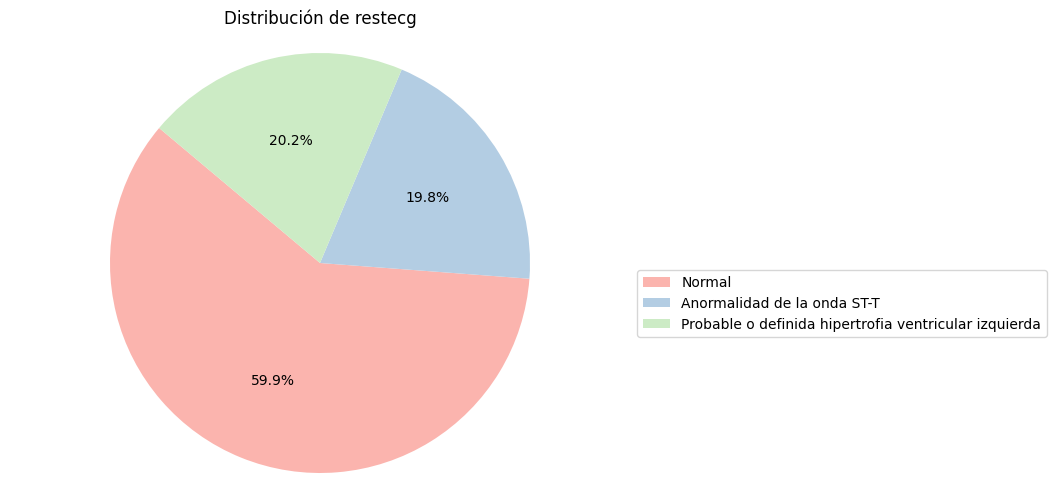

In [100]:
# Datos para el gráfico
valores = [438, 145, 148]  # Número de casos para restecg=0, restecg=1 y restecg=2
etiquetas = ['Normal', 'Anormalidad de la onda ST-T', 'Probable o definida hipertrofia ventricular izquierda']

# Crear el gráfico de quesos con una paleta de colores diferente
plt.figure(figsize=(8, 6))
sns.set_palette('Pastel1')  # Cambiar a una paleta de colores diferente
plt.pie(valores, labels=None, startangle=140, autopct='%1.1f%%', colors=sns.color_palette())
plt.title('Distribución de restecg')
plt.axis('equal')  # Asegurar que el gráfico sea circular

# Mostrar leyenda personalizada
plt.legend(etiquetas, loc="best", bbox_to_anchor=(1, 0.5))

plt.show()



### THALACH

---

Continuamos con thalach, que representa la frecuencia cardiaca en reposo.

In [101]:
# Obtener la distribución de valores de la variable 'thalach' y ordenarla de menor a mayor
distribucion_thalach = df['thalach'].value_counts().sort_index()

# Imprimir la distribución de valores de 'thalach' ordenada de menor a mayor
print(distribucion_thalach)


thalach
100       7
100.0     6
102       3
102.0     1
103       1
         ..
98        4
98.0      3
99        3
99.0      2
?        44
Name: count, Length: 180, dtype: int64


De manera habitual, al no haber decimales los descartamos.

In [102]:
# Eliminar los decimales de la columna 'thalach'
df['thalach'] = df['thalach'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores de la variable 'thalach' y ordenarla de menor a mayor
distribucion_thalach = df['thalach'].value_counts().sort_index()

# Imprimir la distribución de valores de 'thalach' ordenada de menor a mayor
print(distribucion_thalach)


thalach
100    13
102     4
103     4
104     1
105     8
       ..
96      6
97      2
98      7
99      5
?      44
Name: count, Length: 115, dtype: int64


Aquí vemos que la distribución es bastante diversa, y tenemos que 44 registros no están asignados, por lo que debemos darles un valor.

Para ello, veremos a qué tienden los valores.

In [103]:
import numpy as np

# Filtrar los valores diferentes de '?' en la columna 'thalach'
df_filtered = df[df['thalach'] != '?']

# Convertir la columna 'thalach' a tipo numérico
df_filtered['thalach'] = pd.to_numeric(df_filtered['thalach'])

# Calcular la media de los valores en la columna 'thalach'
media_thalach = df_filtered['thalach'].mean()

# Calcular la moda de los valores en la columna 'thalach'
moda_thalach = df_filtered['thalach'].mode()[0]

# Imprimir la media y la moda de 'thalach'
print("Media de thalach:", media_thalach)
print("Moda de thalach:", moda_thalach)


Media de thalach: 138.10771470160117
Moda de thalach: 140


<ipython-input-103-f0eece54ca33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['thalach'] = pd.to_numeric(df_filtered['thalach'])


Vemos que deja bastante evidente que tanto la media como la moda tienden a que lo más común en estas enfermedades es tener una frecuencia cardiaca en reposo entorno a 140, por lo que otorgaremos este valor a los registros desconocidos.

In [104]:
# Reemplazar los valores '?' por '140' en la columna 'thalach'
df['thalach'].replace('?', '140', inplace=True)

# Mostrar la distribución de valores de la variable 'thalach'
distribucion_thalach = df['thalach'].value_counts().sort_index()
print(distribucion_thalach)


thalach
100    13
102     4
103     4
104     1
105     8
       ..
95      2
96      6
97      2
98      7
99      5
Name: count, Length: 114, dtype: int64


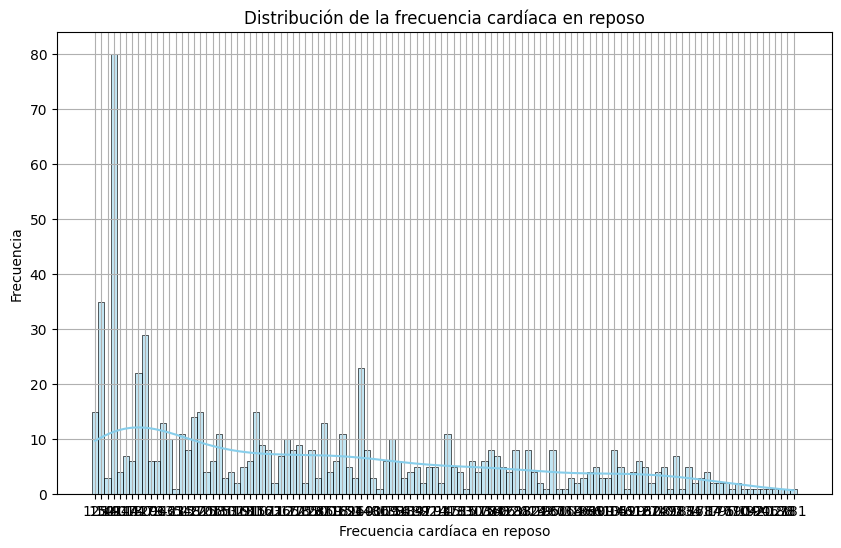

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['thalach'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de la frecuencia cardíaca en reposo')
plt.xlabel('Frecuencia cardíaca en reposo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### EXANG

---

Continuamos con exang, que representa con 1 si existe angina inducida por ejercicio, o 0 en caso contrario

In [106]:
# Mostrar la distribución de valores de la variable 'exang'
distribucion_exang = df['exang'].value_counts()
print(distribucion_exang)


exang
0.0    327
1.0    153
1      113
0       94
?       44
Name: count, dtype: int64


Lo primero como siempre, descartamos decimales al no haber flotantes.

Al haber una clara tendencia hacia una no presencia de angina, asignaremos 0 a los registros con ?.

In [107]:
# Convertir la columna 'exang' a tipo entero
df['exang'] = df['exang'].replace('?', np.nan).astype(float).fillna(0).astype(int)

# Obtener la distribución de valores de la variable 'exang' y ordenarla de menor a mayor
distribucion_exang = df['exang'].value_counts().sort_index()

# Imprimir la distribución de valores de 'exang' ordenada de menor a mayor
print(distribucion_exang)


exang
0    465
1    266
Name: count, dtype: int64


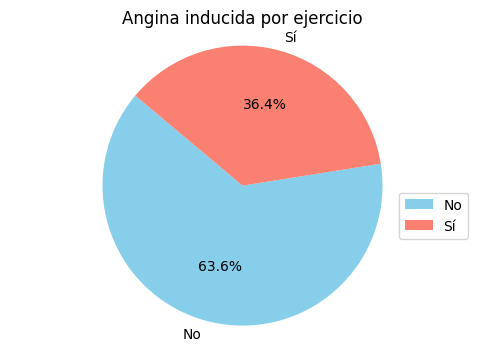

In [108]:
# Datos para el gráfico
valores = [465, 266]  # Número de casos para exang=0 y exang=1
etiquetas = ['No', 'Sí']

# Crear el gráfico de quesos con una paleta de colores diferente
plt.figure(figsize=(6, 4))
colores = ['skyblue', 'salmon']  # Cambiar los colores aquí
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Angina inducida por ejercicio')
plt.axis('equal')  # Asegurar que el gráfico sea circular

# Mostrar leyenda personalizada
plt.legend(loc="best", bbox_to_anchor=(1, 0.5))

plt.show()


### OLDPEAK

---

Continuamos con oldpeak, que representa la depresión del ST inducida por el ejercicio en relación con el reposo.

In [109]:
# Obtener la distribución de valores de la variable 'oldpeak' y ordenarla de menor a mayor
distribucion_oldpeak = df['oldpeak'].value_counts().sort_index()

# Imprimir la distribución de valores de 'oldpeak' ordenada de menor a mayor
print(distribucion_oldpeak)


oldpeak
-.5      1
-.8      1
-.9      1
-0.5     1
-1       2
        ..
4.4      1
5.0      1
5.6      1
6.2      1
?       49
Name: count, Length: 64, dtype: int64


Aquí vemos que sí hay decimales, por lo que no interesa descartarlos, y vemos que su distribución es más compleja, por lo que vamos a ver a qué tiende.

In [110]:
# Filtrar los valores diferentes de '?' en la columna 'oldpeak'
valid_oldpeak = df[df['oldpeak'] != '?']['oldpeak']

# Convertir los valores válidos a numéricos
valid_oldpeak = pd.to_numeric(valid_oldpeak, errors='coerce')

# Calcular la media y la moda de los valores válidos
media_oldpeak = valid_oldpeak.mean()
moda_oldpeak = valid_oldpeak.mode()[0]

# Imprimir la media y la moda de 'oldpeak'
print("Media de oldpeak (sin incluir ?):", media_oldpeak)
print("Moda de oldpeak (sin incluir ?):", moda_oldpeak)


Media de oldpeak (sin incluir ?): 0.8803519061583579
Moda de oldpeak (sin incluir ?): 0.0


Vemos que existen valores negativos que no tienen por qué ser anómalos, por lo que de momento no los vamos a descartar. Vemos que tanto la media como la moda tienden a que el denominador más común suele ser 0, por lo que los 49 registros desconocidos los evaluaremos a 0.

In [111]:

# Reemplazar los valores '?' por 0 en la columna 'oldpeak'
df['oldpeak'].replace('?', 0, inplace=True)

# Convertir los valores de la columna 'oldpeak' a tipo numérico, ignorando los valores no válidos ('?')
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')

# Imprimir la distribución actualizada de valores de 'oldpeak'
distribucion_oldpeak = df['oldpeak'].value_counts().sort_index()
print(distribucion_oldpeak)


oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.5      2
 0.0    346
 0.1      7
 0.2     10
 0.3      5
 0.4      8
 0.5     17
 0.6     11
 0.7      2
 0.8     11
 0.9      4
 1.0     65
 1.1      3
 1.2     11
 1.3      4
 1.4     12
 1.5     34
 1.6     12
 1.7      2
 1.8     10
 1.9      4
 2.0     60
 2.1      2
 2.2      5
 2.3      1
 2.4      3
 2.5     13
 2.6      7
 2.8      5
 2.9      1
 3.0     22
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      2
 3.7      1
 3.8      1
 4.0      6
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: count, dtype: int64


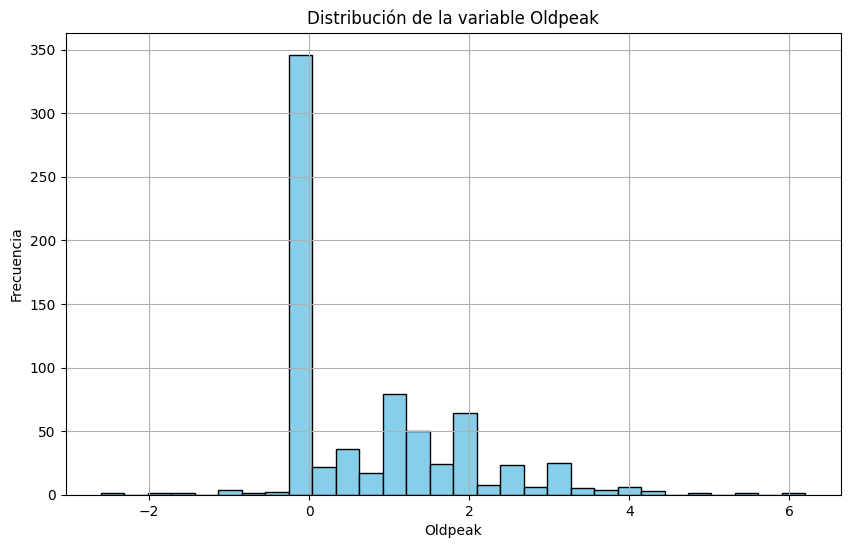

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['oldpeak'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### SLOPE

---

Continuamos con slope, que representa la pendiente del segmento ST en ejercicio máximo, que solo puede tomar los valores 1, 2 y 3 (pendiente ascendente, plano y descendente respectivamente)

In [113]:
# Mostrar la distribución de valores de la variable 'slope'
distribucion_slope = df['slope'].value_counts().sort_index()
print(distribucion_slope)


slope
-9.0    152
1        37
1.0     121
2        89
2.0     187
3        30
3.0      20
?        95
Name: count, dtype: int64


Aquí sí que lo primero es eliminar los decimales al no haber flotantes.

In [114]:
# Convertir la columna 'slope' a tipo string y eliminar decimales
df['slope'] = df['slope'].astype(str).str.split('.').str[0]

# Mostrar la distribución de valores de la variable 'slope'
distribucion_slope = df['slope'].value_counts().sort_index()
print(distribucion_slope)


slope
-9    152
1     158
2     276
3      50
?      95
Name: count, dtype: int64


Aquí al no conocer el alcance exacto de la variable ni la importancia, y al haber una gran cantidad de registros desconocidos que no podemos descartar al ser muy elevado, procedemos a cambiarlos por la moda, que parece a priori que tiene una tendencia plana.

In [115]:
# Reemplazar los valores '?' por 1 en la columna 'slope'
df['slope'].replace('?', '1', inplace=True)

# Reemplazar los valores -9 por 1 en la columna 'slope'
df['slope'].replace('-9', '1', inplace=True)

# Convertir la columna 'slope' a tipo entero
df['slope'] = df['slope'].astype(int)

# Mostrar la distribución actualizada de valores de la variable 'slope'
distribucion_slope = df['slope'].value_counts().sort_index()
print(distribucion_slope)


slope
1    405
2    276
3     50
Name: count, dtype: int64


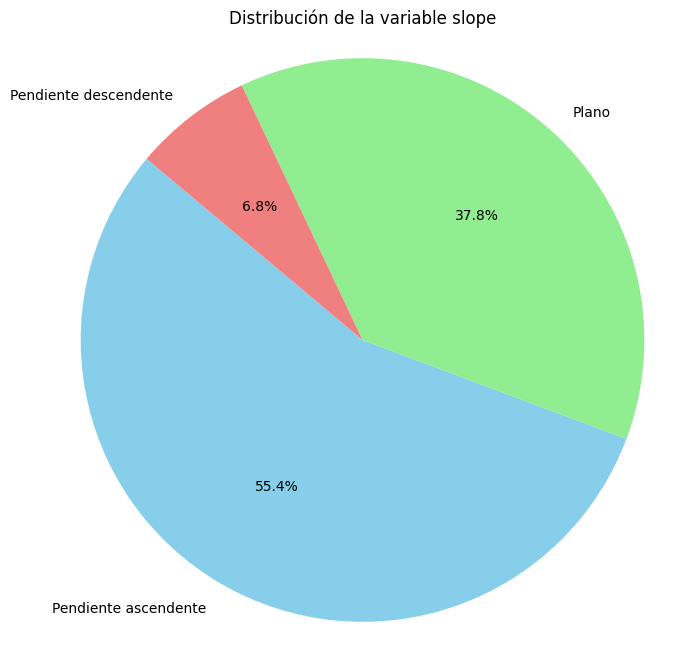

In [116]:
import matplotlib.pyplot as plt

# Obtener los valores únicos y sus conteos
slope_counts = df['slope'].value_counts().sort_index()

# Definir los significados de cada categoría
labels = {1: 'Pendiente ascendente', 2: 'Plano', 3: 'Pendiente descendente'}

# Crear el gráfico de quesos con etiquetas
plt.figure(figsize=(8, 8))
plt.pie(slope_counts, labels=[labels[i] for i in slope_counts.index], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'], startangle=140)
plt.title('Distribución de la variable slope')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.show()


### CA

---

Pasamos a la variable ca, que corresponde con el número de vasos mayores (0-3) coloreados por flouroscopia.

In [117]:
# Mostrar la distribución de valores de la variable 'ca'
distribucion_ca = df['ca'].value_counts().sort_index()
print(distribucion_ca)


ca
-9.0    230
0         2
0.0     145
1         1
1.0      53
2         2
2.0      33
3.0      17
?       248
Name: count, dtype: int64


En primer lugar, como siempre, descartamos decimales al no existir flotantes.

In [118]:
# Descartar los decimales en la distribución de valores de la variable 'ca'
df['ca'] = df['ca'].astype(str).str.split('.').str[0]

# Mostrar la distribución actualizada de valores de la variable 'ca'
distribucion_ca = df['ca'].value_counts().sort_index()
print(distribucion_ca)


ca
-9    230
0     147
1      54
2      35
3      17
?     248
Name: count, dtype: int64


Vemos que a priori no va a resultar una variable muy directa en el aprendizaje de la enfermedad, ya que hay más valores desconocidos que conocidos, por lo que simplemente los sustituiremos por la moda, que es el 0.

In [119]:
# Reemplazar los valores '?' por '0' en la columna 'ca'
df['ca'].replace('?', '0', inplace=True)

# Reemplazar los valores '-9' por '0' en la columna 'ca'
df['ca'].replace('-9', '0', inplace=True)

# Mostrar la distribución actualizada de valores de la variable 'ca'
distribucion_ca = df['ca'].value_counts().sort_index()
print(distribucion_ca)


ca
0    625
1     54
2     35
3     17
Name: count, dtype: int64


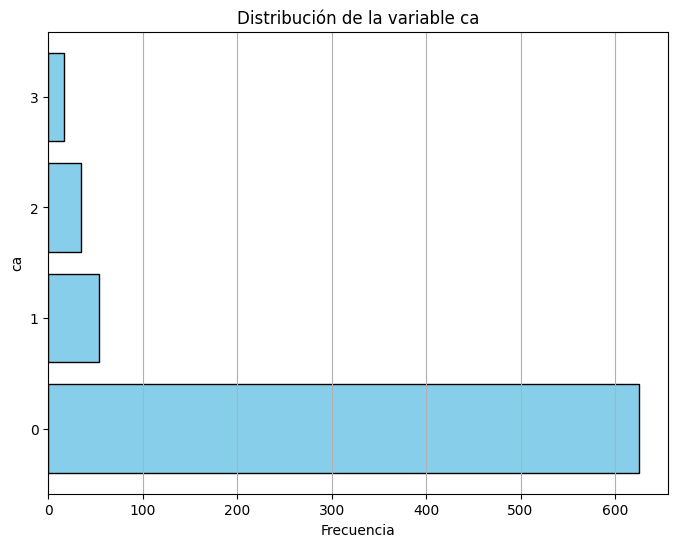

In [120]:
import matplotlib.pyplot as plt

# Obtener los valores únicos y sus conteos
ca_counts = df['ca'].value_counts().sort_index()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(8, 6))
plt.barh(ca_counts.index.astype(str), ca_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable ca')
plt.xlabel('Frecuencia')
plt.ylabel('ca')
plt.grid(axis='x')
plt.show()


Vemos en este caso, que lo normal y común son 0 vasos coloreados.

### THAL

---

Para finalizar la limpieza, analizaremos la variable thal, que representa con los valores 3, 6 y 7 los valores normal, defecto fijo y defecto reversible respectivamente.

In [121]:
# Mostrar la distribución de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()
print(distribucion_thal)


thal
-9.0    210
3        20
3.0     137
6        14
6.0      22
7        50
7.0     110
?       168
Name: count, dtype: int64


Descartamos decimales de la manera habitual.

In [122]:
# Descartar los decimales en la distribución de valores de la variable 'thal'
df['thal'] = df['thal'].astype(str).str.split('.').str[0]

# Mostrar la distribución actualizada de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()
print(distribucion_thal)


thal
-9    210
3     157
6      36
7     160
?     168
Name: count, dtype: int64


Aquí, de manera similar a la varible ca estudiada previamente, al existir multitud de registros desconocidos y no sacar una tendencia clara, decidimos otorgar a los desconocidos un thal normal, de cara a alterar el algoritmo lo menos posible.

In [123]:
# Reemplazar los valores '?' por '3' en la columna 'thal'
df['thal'].replace('?', '3', inplace=True)

# Reemplazar los valores '-9' por '3' en la columna 'thal'
df['thal'].replace('-9', '3', inplace=True)

# Mostrar la distribución actualizada de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()
print(distribucion_thal)


thal
3    535
6     36
7    160
Name: count, dtype: int64


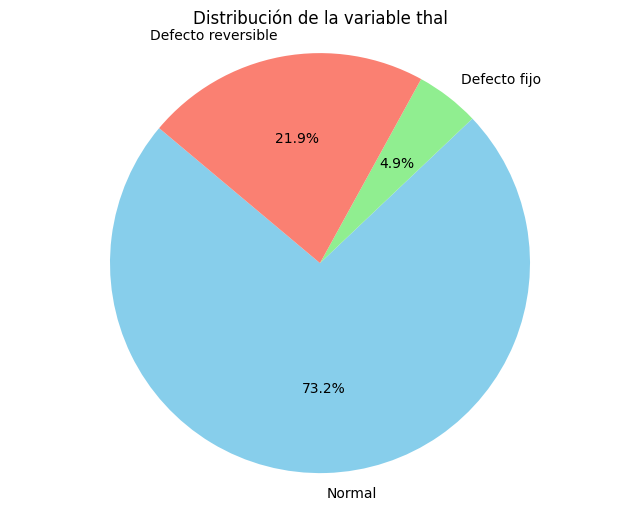

In [124]:
import matplotlib.pyplot as plt

# Definir la distribución de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()

# Definir los colores correspondientes a cada categoría
colors = ['skyblue', 'lightgreen', 'salmon']

# Definir las etiquetas correspondientes a cada categoría
labels = ['Normal', 'Defecto fijo', 'Defecto reversible']

# Crear el gráfico de quesos
plt.figure(figsize=(8, 6))
plt.pie(distribucion_thal, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de la variable thal')
plt.axis('equal')  # Hacer que el gráfico sea circular
plt.show()


Con esto daríamos por finalizada la primera limpieza del dataset de entrenamiento, por lo que podemos proceder a descargarlo.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       731 non-null    int64  
 1   sex       731 non-null    object 
 2   cp        731 non-null    int64  
 3   trestbps  731 non-null    int64  
 4   chol      731 non-null    int64  
 5   fbs       731 non-null    int64  
 6   restecg   731 non-null    int64  
 7   thalach   731 non-null    object 
 8   exang     731 non-null    int64  
 9   oldpeak   731 non-null    float64
 10  slope     731 non-null    int64  
 11  ca        731 non-null    object 
 12  thal      731 non-null    object 
 13  label     731 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 85.7+ KB


In [127]:
from google.colab import files

# Guardar el DataFrame modificado como un nuevo archivo CSV
df.to_csv('train_cleaned.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('train_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Una vez limpio el dataset de train, realizamos la limpieza sobre el dataset de test, y vemos los resultados.

In [ ]:
ruta = "/content/test.csv"
df = pd.read_csv(ruta)

In [ ]:
from google.colab import files

# Guardar el DataFrame modificado como un nuevo archivo CSV
df.to_csv('test_cleaned.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('test_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Observamos que algunos campos no se han limpiado correctamente debido a la diferencia de valores con el dataset de test, por el que añadimos manualmente las mismas lógicas que para el dataset de train.

# 2. **PRIMERA APROXIMACIÓN**

En esta primera aproximación, vamos a generar un primer modelo de prueba kNN sobre el dataset de train y aplicarlo sobre el de test, generando un primer csv estimando las enfermedades de cada uno de los pacientes.

Podemos cargar directamente los datasets limpios descargados del repositorio para no tener que ejecutar todo el paso 1.

In [130]:
ruta = "/content/train_cleaned.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_train = pd.read_csv(ruta)

In [132]:
ruta = "/content/test_cleaned.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_test = pd.read_csv(ruta, sep=';')

In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       731 non-null    int64  
 1   sex       731 non-null    object 
 2   cp        731 non-null    int64  
 3   trestbps  731 non-null    int64  
 4   chol      731 non-null    int64  
 5   fbs       731 non-null    int64  
 6   restecg   731 non-null    int64  
 7   thalach   731 non-null    int64  
 8   exang     731 non-null    int64  
 9   oldpeak   731 non-null    float64
 10  slope     731 non-null    int64  
 11  ca        731 non-null    int64  
 12  thal      731 non-null    int64  
 13  label     731 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 80.1+ KB


In [47]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125,213,0,2,125,1,1.4,1,1,3,0
1,54,1,3,120,237,0,0,150,1,1.5,1,0,7,2
2,63,1,4,140,0,0,2,149,0,2.0,1,0,3,2
3,52,0,2,140,0,0,0,140,0,0.0,1,0,3,0
4,55,1,4,140,217,0,0,111,1,5.6,3,0,7,3


In [133]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    int64  
 1   sex       184 non-null    int64  
 2   cp        184 non-null    int64  
 3   trestbps  184 non-null    int64  
 4   chol      184 non-null    int64  
 5   fbs       184 non-null    int64  
 6   restecg   184 non-null    int64  
 7   thalach   184 non-null    int64  
 8   exang     184 non-null    int64  
 9   oldpeak   184 non-null    float64
 10  slope     184 non-null    int64  
 11  ca        184 non-null    int64  
 12  thal      184 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 18.8 KB


In [ ]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156,173,0,2,119,1,3.0,3,0,3
1,52,1,2,160,196,0,0,165,0,0.0,1,0,3
2,48,1,2,100,0,0,0,100,0,0.0,1,0,3
3,62,1,4,115,0,0,0,128,1,2.5,3,0,3
4,51,1,3,110,175,0,0,123,0,0.6,1,0,3


En esta primera aproximación ya con el dataset limpio, aplicaremos un modelo básico de regresión logística.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
X_test = df_test  # No eliminamos la columna 'ID' del conjunto de datos de prueba

# Inicializar el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(X_test)

# Crear una columna de ID secuencial para identificar cada registro en el dataset de prueba
df_test['ID'] = range(len(df_test))

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': df_test['ID'], 'label': predictions})


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Descargamos el fichero a entregar y comprobamos la primera predicción.

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_2.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Esta primera predicción nos otorga un calidad 0.50543, lo que es una aproximación bastante decente en esta primer modelo, por lo que continuamos en la búsqueda de una mayor aproximación.

A continuación vamos a realizar un modelo con Random Forest, uno de los modelos más óptimos de predicción.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Bosques Aleatorios
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
predicted_labels_df.head()

,ID,label
0,0,2
1,1,0
2,2,0
3,3,2
4,4,0


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_3.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tras esto obtenemos una aproximación de 0.58695, lo que supone una mejora notable de la predicción.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo KNN
model = KNeighborsClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_9.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_9.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_9.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_9.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_10.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de árbol de decisión como estimador base
base_estimator = DecisionTreeClassifier()

# Inicializar el ensemble Bagging con árboles de decisión como estimadores base
model = BaggingClassifier(base_estimator=base_estimator)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_11.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_11.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_11.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Gradient Boosting
model = GradientBoostingClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_12.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_12.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_12.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Después de probar diferentes modelos sobre el dataset limpio, no conseguimos obtener una estimación mayor a 0.58695, por lo que seguimos tratando el dataset en busca de mejorarlo de cara a que los modelos puedan hacer estimaciones más precisas.

A continuación optaremos por la normalización de las variables numéricas.

# **3. NORMALIZACIÓN**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas a normalizar
columns_to_normalize = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Crear un MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las características seleccionadas
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas a normalizar
columns_to_normalize = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Crear un MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las características seleccionadas en el conjunto de entrenamiento
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])

# Aplicar la misma transformación al conjunto de prueba
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])


In [ ]:
# Mapear los valores de 'thal' a 1, 2 y 3
mapping = {3: 1, 6: 2, 7: 3}

# Reemplazar los valores en el conjunto de entrenamiento
df_train['thal'] = df_train['thal'].replace(mapping)

# Reemplazar los valores en el conjunto de prueba
df_test['thal'] = df_test['thal'].replace(mapping)


In [ ]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,0.305556,0.353234,0,2,0.457746,1,0.454545,1,1,1,0
1,54,1,3,0.259259,0.393035,0,0,0.633803,1,0.465909,1,0,3,2
2,63,1,4,0.444444,0.000000,0,2,0.626761,0,0.522727,1,0,1,2
3,52,0,2,0.444444,0.000000,0,0,0.563380,0,0.295455,1,0,1,0
4,55,1,4,0.444444,0.359867,0,0,0.359155,1,0.931818,3,0,3,3


In [ ]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,0.592593,0.286899,0,2,0.415493,1,0.636364,3,0,1
1,52,1,2,0.629630,0.325041,0,0,0.739437,0,0.295455,1,0,1
2,48,1,2,0.074074,0.000000,0,0,0.281690,0,0.295455,1,0,1
3,62,1,4,0.212963,0.000000,0,0,0.478873,1,0.579545,3,0,1
4,51,1,3,0.166667,0.290216,0,0,0.443662,0,0.363636,1,0,1


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
df_train.to_csv('train_normalized.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('train_normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
df_test.to_csv('test_normalized.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('test_normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Una vez normalizado el dataset, procedemos a entrenar varios modelos más con el fin de mejorar la predicción.

# **4. MODELOS NORMALIZADOS**

De la misma manera, podemos cargar los datasets normalizados directamente del repositorio.

In [134]:
ruta = "/content/train_normalized.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_train = pd.read_csv(ruta, sep=';')

In [135]:
ruta = "/content/test_normalized.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_test = pd.read_csv(ruta, sep=';')

In [136]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       731 non-null    int64  
 1   sex       731 non-null    int64  
 2   cp        731 non-null    int64  
 3   trestbps  731 non-null    float64
 4   chol      731 non-null    float64
 5   fbs       731 non-null    int64  
 6   restecg   731 non-null    int64  
 7   thalach   731 non-null    float64
 8   exang     731 non-null    int64  
 9   oldpeak   731 non-null    float64
 10  slope     731 non-null    int64  
 11  ca        731 non-null    int64  
 12  thal      731 non-null    int64  
 13  label     731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    int64

In [ ]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,0.305556,0.353234,0,2,0.457746,1,0.454545,1,1,1,0
1,54,1,3,0.259259,0.393035,0,0,0.633803,1,0.465909,1,0,3,2
2,63,1,4,0.444444,0.000000,0,2,0.626761,0,0.522727,1,0,1,2
3,52,0,2,0.444444,0.000000,0,0,0.563380,0,0.295455,1,0,1,0
4,55,1,4,0.444444,0.359867,0,0,0.359155,1,0.931818,3,0,3,3


In [ ]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,0.592593,0.286899,0,2,0.415493,1,0.636364,3,0,1
1,52,1,2,0.629630,0.325041,0,0,0.739437,0,0.295455,1,0,1
2,48,1,2,0.074074,0.000000,0,0,0.281690,0,0.295455,1,0,1
3,62,1,4,0.212963,0.000000,0,0,0.478873,1,0.579545,3,0,1
4,51,1,3,0.166667,0.290216,0,0,0.443662,0,0.363636,1,0,1


Empezamos entrenando un modelo de Random Forest básico, ya que en entrenamientos anteriores hemos visto que ha sido el modelo más preciso.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Bosques Aleatorios
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_13.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_13.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Este modelo nos otorga una precisión de 0.56521, lo que es una buena aproximación inicial que nos da indicios de que este dataset puede ser más preciso.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y)
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Random Forest
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Definir un umbral de importancia
threshold = 0.03  # Por ejemplo, establecer el umbral en 0.05

# Seleccionar las características con una importancia mayor que el umbral
selected_features = X_train.columns[feature_importance > threshold]

# Crear un nuevo conjunto de datos de entrenamiento solo con las características seleccionadas
X_train_selected = X_train[selected_features]

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


En este caso hemos hecho una serie de mejoras sobre el modelo básico Random Forest, añadiendo lo siguiente:



*   **Cálculo de características:** Utilizamos un clasificador para calcular la importancia de cada característica en la predicción del resultado.
*  **Selección de características:** Definimos un umbral de importancia (en este caso, 0.03) y seleccionamos solo aquellas características cuya importancia es mayor que este umbral.

El modelo entrena únicamente con los datos que cumplen dicha condición.



Observamos en Kaggle que este modelo es el que mayor estimación al problema nos otorga, dándonos una estimación de 0.59239, lo que nos da a entender que el modelo es útil y la normalización efectiva.

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_14.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_14.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar el modelo Gradient Boosting
model = GradientBoostingClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Definir un umbral de importancia
threshold = 0.05  # Por ejemplo, establecer el umbral en 0.05

# Seleccionar las características con una importancia mayor que el umbral
selected_features = X_train.columns[feature_importance > threshold]

# Crear un nuevo conjunto de datos de entrenamiento solo con las características seleccionadas
X_train_selected = X_train[selected_features]

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_16.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_16.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Dividir el conjunto de datos de entrenamiento en características (X_train) y etiquetas (y_train)
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Dividir el conjunto de datos de prueba en características (X_test)
X_test = df_test

# Normalizar las características usando StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Inicializar el modelo SVM
model = SVC(kernel='rbf', C=0.1, random_state=42)

# Entrenar el modelo SVM con el conjunto de entrenamiento normalizado
model.fit(X_train_normalized, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_normalized)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_17.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_17.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE

# Aplicar T-SNE para reducir la dimensionalidad en df_train
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(df_train.drop(['label'], axis=1))


# Convertir los resultados en DataFrames para su posterior uso
df_train = pd.DataFrame(X_train_tsne, columns=['TSNE_1', 'TSNE_2'])


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_30.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_30.csv')

Tras entrenar varios modelos más aplicando estas mejoras sobre el dataset normalizado, no conseguimos un entrenamiento que supere la precisión del modelo RandomForest que hemos estudiado en este apartado.

# 5. **SELECCIÓN DE CARACTERÍSTICAS**

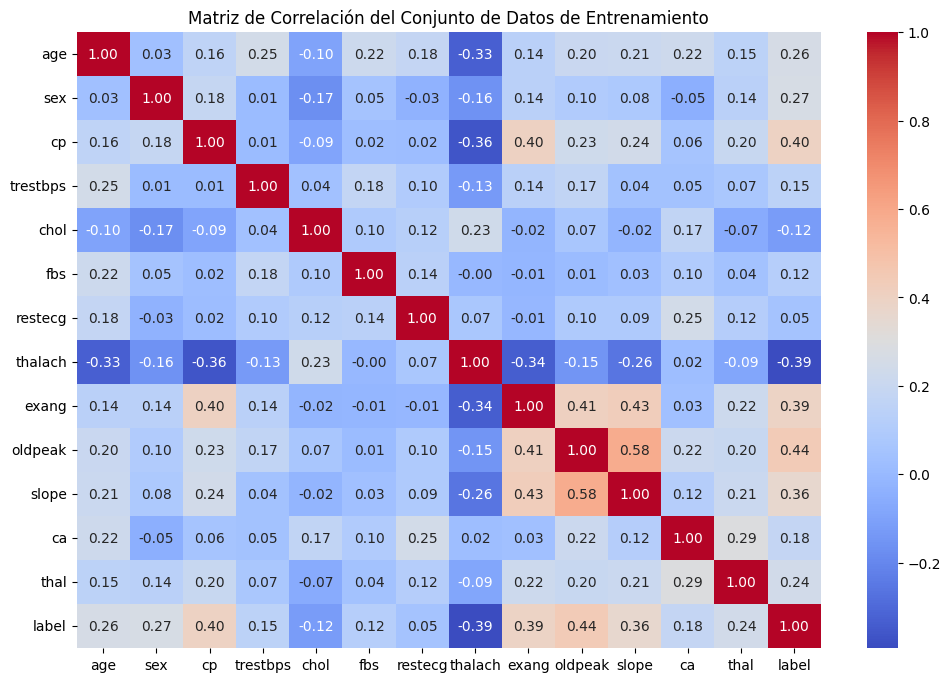

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_train.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación del Conjunto de Datos de Entrenamiento')
plt.show()


En este paso obtenemos la matriz de correlación, que muestra la incidencia directa de unas variables sobre otras, lo que nos puede ayudar para futuras modificaciones del dataset de cara a mejorar el modelo.

# 6. **OPTIMIZACIÓN DE RANDOM FOREST**

Debido a que el modelo Random Forest es el que mayor precisión nos ha obtenido con el dataset normalizado, vamos a indagar en él y ver si podemos conseguir una versión más precisa de él que nos mejore la predicción.

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los hiperparámetros para la búsqueda aleatoria
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier()

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Ejecutar la búsqueda aleatoria para encontrar los mejores hiperparámetros
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = random_search.best_params_

# Crear un nuevo modelo con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(**best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = best_rf_model.predict(X_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(X_test)), 'label': predictions})


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_18.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_18.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

En esta versión, hemos hecho que el modelo haga una búsqueda aleatoria de hiperparámetros. Utiliza RandomizedSearchCV para encontrar la mejor combinación de hiperparámetros que optimice el rendimiento del modelo, tras lo que realiza un entrenamiento

Este modelo nos otorga una predicción de 0.548, por lo que no mejora los modelos estudiados con anterioridad, y reduce drásticamente la precisión.


# 7. **CÁLCULO DE MÉTRICAS**

En este apartado, procederemos a evaluar las métricas de algunos de los modelos que mejor predicción han obtenido, comparándolos con algunos de baja predicción, con el fin de medir de manera visual la diferencia entre la eficacia de modelos.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Realizar validación cruzada
cv_scores_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision_macro')
cv_scores_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro')
cv_scores_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

# Calcular la media y la desviación estándar de las métricas
mean_accuracy = np.mean(cv_scores_accuracy)
mean_precision = np.mean(cv_scores_precision)
mean_recall = np.mean(cv_scores_recall)
mean_f1 = np.mean(cv_scores_f1)

std_accuracy = np.std(cv_scores_accuracy)
std_precision = np.std(cv_scores_precision)
std_recall = np.std(cv_scores_recall)
std_f1 = np.std(cv_scores_f1)

# Imprimir las métricas
print("Métricas para el conjunto de prueba:")
print("Precisión promedio:", mean_accuracy)
print("Desviación estándar de la precisión:", std_accuracy)
print("Precisión promedio:", mean_precision)
print("Desviación estándar de la precisión:", std_precision)
print("Recall promedio:", mean_recall)
print("Desviación estándar de la recall:", std_recall)
print("Puntuación F1 promedio:", mean_f1)
print("Desviación estándar de la puntuación F1:", std_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Métricas para el conjunto de prueba:
Precisión promedio: 0.5170813530891809
Desviación estándar de la precisión: 0.027204510444336794
Precisión promedio: 0.36036891300028867
Desviación estándar de la precisión: 0.08320202589665282
Recall promedio: 0.3263109256335063
Desviación estándar de la recall: 0.031538421439311765
Puntuación F1 promedio: 0.34380696293968244
Desviación estándar de la puntuación F1: 0.04556294681267274


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Realizar validación cruzada
cv_scores_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision_macro')
cv_scores_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro')
cv_scores_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

# Calcular la media y la desviación estándar de las métricas
mean_accuracy = np.mean(cv_scores_accuracy)
mean_precision = np.mean(cv_scores_precision)
mean_recall = np.mean(cv_scores_recall)
mean_f1 = np.mean(cv_scores_f1)

std_accuracy = np.std(cv_scores_accuracy)
std_precision = np.std(cv_scores_precision)
std_recall = np.std(cv_scores_recall)
std_f1 = np.std(cv_scores_f1)

# Imprimir las métricas
print("Métricas para el conjunto de prueba:")
print("Precisión promedio:", mean_accuracy)
print("Desviación estándar de la precisión:", std_accuracy)
print("Precisión promedio:", mean_precision)
print("Desviación estándar de la precisión:", std_precision)
print("Recall promedio:", mean_recall)
print("Desviación estándar de la recall:", std_recall)
print("Puntuación F1 promedio:", mean_f1)
print("Desviación estándar de la puntuación F1:", std_f1)


Métricas para el conjunto de prueba:
Precisión promedio: 0.5074550368092443
Desviación estándar de la precisión: 0.02676441926627704
Precisión promedio: 0.34364530370891927
Desviación estándar de la precisión: 0.04830046711267785
Recall promedio: 0.33571603933700706
Desviación estándar de la recall: 0.02468746498328984
Puntuación F1 promedio: 0.3374468511945333
Desviación estándar de la puntuación F1: 0.03505496484861901


Voy a comparar las métricas de Random Forest y Gradient Boosting para el conjunto de prueba:

Random Forest:

Precisión promedio: 0.5171
Desviación estándar de la precisión: 0.0272
Precisión promedio (macro): 0.3604
Desviación estándar de la precisión (macro): 0.0832
Recall promedio: 0.3263
Desviación estándar del recall: 0.0315
Puntuación F1 promedio: 0.3438
Desviación estándar de la puntuación F1: 0.0456
Gradient Boosting:

Precisión promedio: 0.5075
Desviación estándar de la precisión: 0.0268
Precisión promedio (macro): 0.3436
Desviación estándar de la precisión (macro): 0.0483
Recall promedio: 0.3357
Desviación estándar del recall: 0.0247
Puntuación F1 promedio: 0.3374
Desviación estándar de la puntuación F1: 0.0351
Comparación:

En cuanto a la precisión promedio, Random Forest supera ligeramente a Gradient Boosting.
La desviación estándar de la precisión es más baja en Random Forest, lo que indica una mayor consistencia en el rendimiento entre los pliegues de la validación cruzada.
En términos de precisión promedio (macro), Gradient Boosting tiene una ligera ventaja sobre Random Forest.
La desviación estándar de la precisión (macro) es más baja en Random Forest, lo que indica una mayor consistencia en la precisión del modelo en todas las clases.
Random Forest tiene un recall promedio ligeramente más alto que Gradient Boosting.
Las desviaciones estándar del recall son similares para ambos modelos.
La puntuación F1 promedio es ligeramente más alta en Gradient Boosting, pero la desviación estándar de la puntuación F1 es más baja en Random Forest.
En resumen, ambos modelos tienen un rendimiento comparable en términos de precisión y recall, pero Random Forest parece tener una mayor consistencia en la precisión entre los pliegues de la validación cruzada, mientras que Gradient Boosting muestra una mayor consistencia en la precisión promedio (macro). La elección entre los dos modelos puede depender de las necesidades específicas del problema y de la importancia relativa de la precisión y el equilibrio entre las clases.

# 8. **CREACIÓN DE NUEVAS CARACTERÍSTICAS**

En este apartado, vamos a realizar unas modificaciones sobre el dataset, creando nuevas variables a partir de combinaciones entre variables que veamos que están correlacionadas gracias a la matriz de correlación. Con este nuevo dataset probaremos algunos de los modelos que han sido más efectivo, a ver si alcanzan una mejoría en la predicción.

In [137]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,0.305556,0.353234,0,2,0.457746,1,0.454545,1,1,1,0
1,54,1,3,0.259259,0.393035,0,0,0.633803,1,0.465909,1,0,3,2
2,63,1,4,0.444444,0.000000,0,2,0.626761,0,0.522727,1,0,1,2
3,52,0,2,0.444444,0.000000,0,0,0.563380,0,0.295455,1,0,1,0
4,55,1,4,0.444444,0.359867,0,0,0.359155,1,0.931818,3,0,3,3


Vamos a considerar las siguientes combinaciones en base a las correlaciones entre variables:


1.   Multiplicar la edad (age) por la presión arterial en reposo (trestbps).
2.   Multiplicar la edad (age) por el nivel de colesterol (chol).
3.   Multiplicar la edad (age) por la frecuencia cardíaca máxima alcanzada (thalach).
4. Multiplicar la presión arterial en reposo (trestbps) por el nivel de colesterol (chol).
5.
Multiplicar la presión arterial en reposo (trestbps) por la frecuencia cardíaca máxima alcanzada (thalach).
6. Multiplicar el nivel de colesterol (chol) por la frecuencia cardíaca máxima alcanzada (thalach).




In [ ]:
# Crear nuevas características combinando las existentes
df_train['age_trestbps'] = df_train['age'] * df_train['trestbps']
df_train['age_chol'] = df_train['age'] * df_train['chol']
df_train['age_thalach'] = df_train['age'] * df_train['thalach']
df_train['trestbps_chol'] = df_train['trestbps'] * df_train['chol']
df_train['trestbps_thalach'] = df_train['trestbps'] * df_train['thalach']
df_train['chol_thalach'] = df_train['chol'] * df_train['thalach']

# Mostrar las primeras filas del conjunto de datos con las nuevas características
print(df_train.head())


   age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  \
0   51    1   1  0.305556  0.353234    0        2  0.457746      1  0.454545   
1   54    1   3  0.259259  0.393035    0        0  0.633803      1  0.465909   
2   63    1   4  0.444444  0.000000    0        2  0.626761      0  0.522727   
3   52    0   2  0.444444  0.000000    0        0  0.563380      0  0.295455   
4   55    1   4  0.444444  0.359867    0        0  0.359155      1  0.931818   

   slope  ca  thal  label  age_trestbps   age_chol  age_thalach  \
0      1   1     1      0     15.583333  18.014925    23.345070   
1      1   0     3      2     14.000000  21.223881    34.225352   
2      1   0     1      2     28.000000   0.000000    39.485915   
3      1   0     1      0     23.111111   0.000000    29.295775   
4      3   0     3      3     24.444444  19.792703    19.753521   

   trestbps_chol  trestbps_thalach  chol_thalach  
0       0.107933          0.139867      0.161692  
1       0.1018

In [ ]:
# Crear nuevas características combinando las existentes en el conjunto de datos de prueba
df_test['age_trestbps'] = df_test['age'] * df_test['trestbps']
df_test['age_chol'] = df_test['age'] * df_test['chol']
df_test['age_thalach'] = df_test['age'] * df_test['thalach']
df_test['trestbps_chol'] = df_test['trestbps'] * df_test['chol']
df_test['trestbps_thalach'] = df_test['trestbps'] * df_test['thalach']
df_test['chol_thalach'] = df_test['chol'] * df_test['thalach']

# Verificar que las nuevas características se crearon correctamente
print("Columnas del conjunto de datos de prueba después de la creación de nuevas características:")
print(df_test.columns)

# Mostrar las primeras filas del conjunto de datos de prueba para verificar los cambios
print("\nPrimeras filas del conjunto de datos de prueba:")
print(df_test.head())


Columnas del conjunto de datos de prueba después de la creación de nuevas características:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_trestbps', 'age_chol',
       'age_thalach', 'trestbps_chol', 'trestbps_thalach', 'chol_thalach'],
      dtype='object')

Primeras filas del conjunto de datos de prueba:
   age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  \
0   57    1   4  0.592593  0.286899    0        2  0.415493      1  0.636364   
1   52    1   2  0.629630  0.325041    0        0  0.739437      0  0.295455   
2   48    1   2  0.074074  0.000000    0        0  0.281690      0  0.295455   
3   62    1   4  0.212963  0.000000    0        0  0.478873      1  0.579545   
4   51    1   3  0.166667  0.290216    0        0  0.443662      0  0.363636   

   slope  ca  thal  age_trestbps   age_chol  age_thalach  trestbps_chol  \
0      3   0     1     33.777778  16.353234    23.68

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y)
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Random Forest
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Definir un umbral de importancia
threshold = 0.03  # Por ejemplo, establecer el umbral en 0.05

# Seleccionar las características con una importancia mayor que el umbral
selected_features = X_train.columns[feature_importance > threshold]

# Crear un nuevo conjunto de datos de entrenamiento solo con las características seleccionadas
X_train_selected = X_train[selected_features]

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_19.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_19.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Podemos considerar también la eliminación de columnas poco relevantes en el mapa de correlación.

In [ ]:
# Eliminar las columnas restecg, fbs y ca del conjunto de entrenamiento
df_train = df_train.drop(['restecg', 'fbs', 'ca'], axis=1)

# Eliminar las columnas restecg, fbs y ca del conjunto de prueba
df_test = df_test.drop(['restecg', 'fbs', 'ca'], axis=1)


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_20.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Con esta serie de combinaciones, probando varios modelos, ninguno consigue acercarse a la predicción con el modelo normalizado básico, por lo que procedemos a descartar estas predicciones.

# 9. **CONCLUSIÓN**

Después de realizar diversos estudios y análisis sobre el conjunto de datos, hemos podido concluir que para este estudio, **el modelo que mejor desempeño ha mostrado es el Random Forest con un umbral de importancia de 0.03**.

A través de varias evaluaciones y comparaciones con otros modelos, se ha observado que el Random Forest **obtiene las métricas más favorables** en términos de precisión, exhaustividad y puntuación F1.

Se llevaron a cabo varias etapas de preprocesamiento de datos, incluida la normalización de los datos, la eliminación de características con baja importancia y la manipulación de valores faltantes. Luego, se aplicaron técnicas de modelado y validación cruzada para evaluar el rendimiento de diferentes algoritmos.

A partir de estos procesos, se ha demostrado que **la normalización es el proceso más robusto y generalizable junto con la limpieza general del dataset**.




